In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Read training, validation, and testing data.

Dataset used is images of playing cards. The class is the combination of suit and number. 

In [2]:
train = tf.keras.utils.image_dataset_from_directory(directory="./cards/train/", labels="inferred", label_mode="categorical", color_mode="rgb", image_size=(224,224), seed=1234)
valid = tf.keras.utils.image_dataset_from_directory(directory="./cards/valid/", labels="inferred", label_mode="categorical", color_mode="rgb", image_size=(224,224), seed=1234)
test = tf.keras.utils.image_dataset_from_directory(directory="./cards/test/", labels="inferred", label_mode="categorical", color_mode="rgb", image_size=(224,224), seed=1234)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


Output the classes seen

In [3]:
classes = train.class_names
print(classes)
num_classes = len(classes)
print(num_classes)

['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']
53


Print 9 sample images from the training dataset

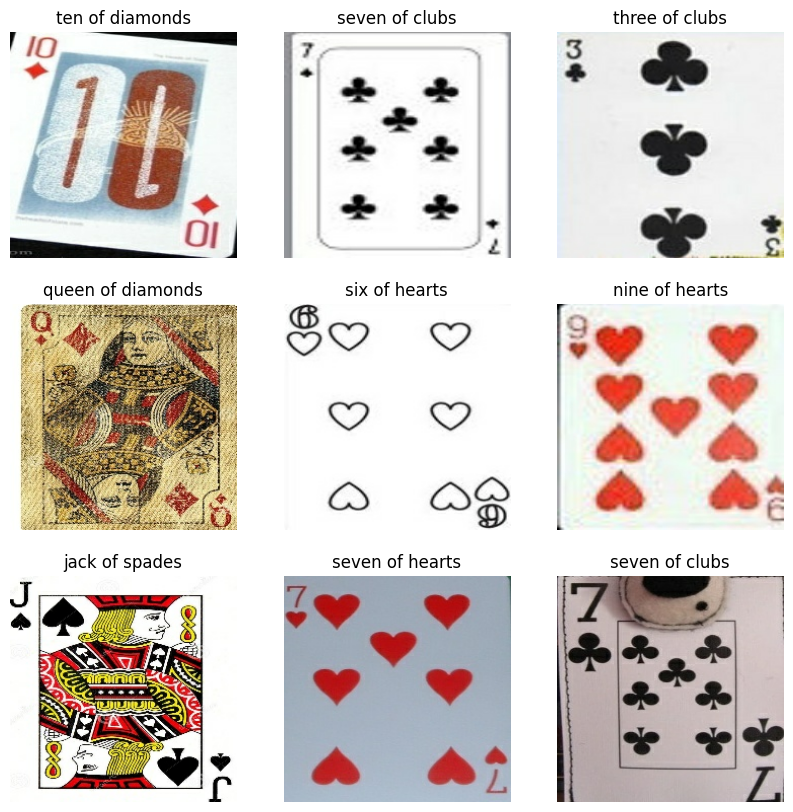

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
	for i in range(9):
		ax = plt.subplot(3, 3, i + 1)
		plt.imshow(images[i].numpy().astype("uint8"))
		plt.title(classes[labels[i].numpy().argmax()])
		plt.axis("off")

Plot training data as histogram. Verify that there are enough examples for each class

In [5]:
data = (np.concatenate([([z.numpy().argmax() for z in y]) for x, y in train], axis=0))
print(data.shape)

(7624,)


(array([120., 129., 171., 181., 138., 159., 152., 135., 150., 138., 136.,
        158., 157., 114., 154., 140., 171., 160., 168., 172., 115., 128.,
        135., 125., 151., 124., 129., 133., 154., 161., 163., 139., 162.,
        108., 124., 143., 165., 152., 139., 127., 158., 141., 151., 129.,
        158., 126., 153., 113., 142., 130., 133., 155., 155.]),
 array([ 0.        ,  0.98113208,  1.96226415,  2.94339623,  3.9245283 ,
         4.90566038,  5.88679245,  6.86792453,  7.8490566 ,  8.83018868,
         9.81132075, 10.79245283, 11.77358491, 12.75471698, 13.73584906,
        14.71698113, 15.69811321, 16.67924528, 17.66037736, 18.64150943,
        19.62264151, 20.60377358, 21.58490566, 22.56603774, 23.54716981,
        24.52830189, 25.50943396, 26.49056604, 27.47169811, 28.45283019,
        29.43396226, 30.41509434, 31.39622642, 32.37735849, 33.35849057,
        34.33962264, 35.32075472, 36.30188679, 37.28301887, 38.26415094,
        39.24528302, 40.22641509, 41.20754717, 42.188679

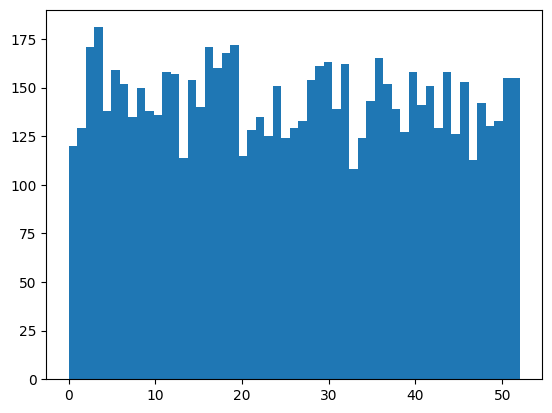

In [6]:
plt.hist(data, bins=num_classes)

Check data shape

In [7]:
for image_batch, labels_batch in train:
	print(image_batch.shape)
	print(labels_batch.shape)
	break

(32, 224, 224, 3)
(32, 53)


Build the model

In [8]:
model = tf.keras.Sequential([
	tf.keras.layers.Rescaling(1./255),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dense(num_classes, activation='softmax')
])

Compile model

In [9]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

Run the model

In [10]:
model.fit(train, validation_data=valid, epochs=3)

Epoch 1/3
239/239 [==============================] - 53s 220ms/step - loss: 11.4032 - accuracy: 0.0195 - val_loss: 3.9694 - val_accuracy: 0.0189
Epoch 2/3
239/239 [==============================] - 51s 212ms/step - loss: 3.9689 - accuracy: 0.0215 - val_loss: 3.9718 - val_accuracy: 0.0189
Epoch 3/3
239/239 [==============================] - 54s 224ms/step - loss: 3.9668 - accuracy: 0.0210 - val_loss: 3.9724 - val_accuracy: 0.0189


Check test data

In [11]:
test_loss, test_acc = model.evaluate(test, verbose=2)
print("\nTest Accuracy: ", test_acc)
print("\nTest Loss: ", test_loss)

9/9 - 0s - loss: 3.9717 - accuracy: 0.0189 - 311ms/epoch - 35ms/step

Test Accuracy:  0.01886792480945587

Test Loss:  3.971733570098877


Repeat with convolution.

In [12]:
model2 = tf.keras.Sequential([
	tf.keras.layers.Rescaling(1./255),
	tf.keras.layers.Conv2D(32, 3, activation='relu'),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Conv2D(32, 3, activation='relu'),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [13]:
model2.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
model2.fit(train, validation_data=valid, epochs=3)

Epoch 1/3


c:\Users\Unicoranium\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


239/239 [==============================] - 174s 725ms/step - loss: 3.0436 - accuracy: 0.2853 - val_loss: 1.5579 - val_accuracy: 0.5736
Epoch 2/3
239/239 [==============================] - 174s 726ms/step - loss: 1.3350 - accuracy: 0.6440 - val_loss: 1.3100 - val_accuracy: 0.6302
Epoch 3/3
239/239 [==============================] - 175s 733ms/step - loss: 0.5212 - accuracy: 0.8640 - val_loss: 1.5531 - val_accuracy: 0.7132


In [15]:
test_loss, test_acc = model2.evaluate(test, verbose=2)
print("\nTest Accuracy: ", test_acc)
print("\nTest Loss: ", test_loss)

9/9 - 1s - loss: 1.6981 - accuracy: 0.6868 - 1s/epoch - 147ms/step

Test Accuracy:  0.6867924332618713

Test Loss:  1.6980669498443604


Initialize base model for transfer learning

In [16]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
image_batch, label_batch = next(iter(train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)
base_model.trainable = False

(32, 7, 7, 1280)


Add head layer

In [17]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [18]:
prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 53)


In [19]:
input = tf.keras.Input(shape=(224, 224, 3))
rescale = tf.keras.layers.Rescaling(1./255)
x = rescale(input)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = prediction_layer(x)
model3 = tf.keras.Model(input, output)

In [20]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate), loss="categorical_crossentropy", metrics=['accuracy'])

In [21]:
initial_epochs = 3

loss0, accuracy0 = model.evaluate(valid)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))
history = model.fit(train, epochs=initial_epochs, validation_data=valid)

9/9 [==============================] - 1s 31ms/step - loss: 3.9724 - accuracy: 0.0189
initial loss: 3.97
initial accuracy: 0.02
Epoch 1/3
239/239 [==============================] - 54s 222ms/step - loss: 3.9653 - accuracy: 0.0226 - val_loss: 3.9727 - val_accuracy: 0.0189
Epoch 2/3
239/239 [==============================] - 53s 219ms/step - loss: 3.9651 - accuracy: 0.0227 - val_loss: 3.9728 - val_accuracy: 0.0189
Epoch 3/3
239/239 [==============================] - 52s 217ms/step - loss: 3.9649 - accuracy: 0.0227 - val_loss: 3.9731 - val_accuracy: 0.0189


By far, the best performing network was the convolutional neural network. This is expected as convolutional networks generally perform better at image classification. The worst performing network was the transfer learning model. This is likely due to just how different this data is from the one that was used to train the model. The original model may have not seen most of the different playing cards.